In [1]:
import modules.vae_nn_mapping
import modules.restore_networks
from os.path import split
import resources.sinusoidal
import numpy as np
# Matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
%matplotlib inline

## DATA

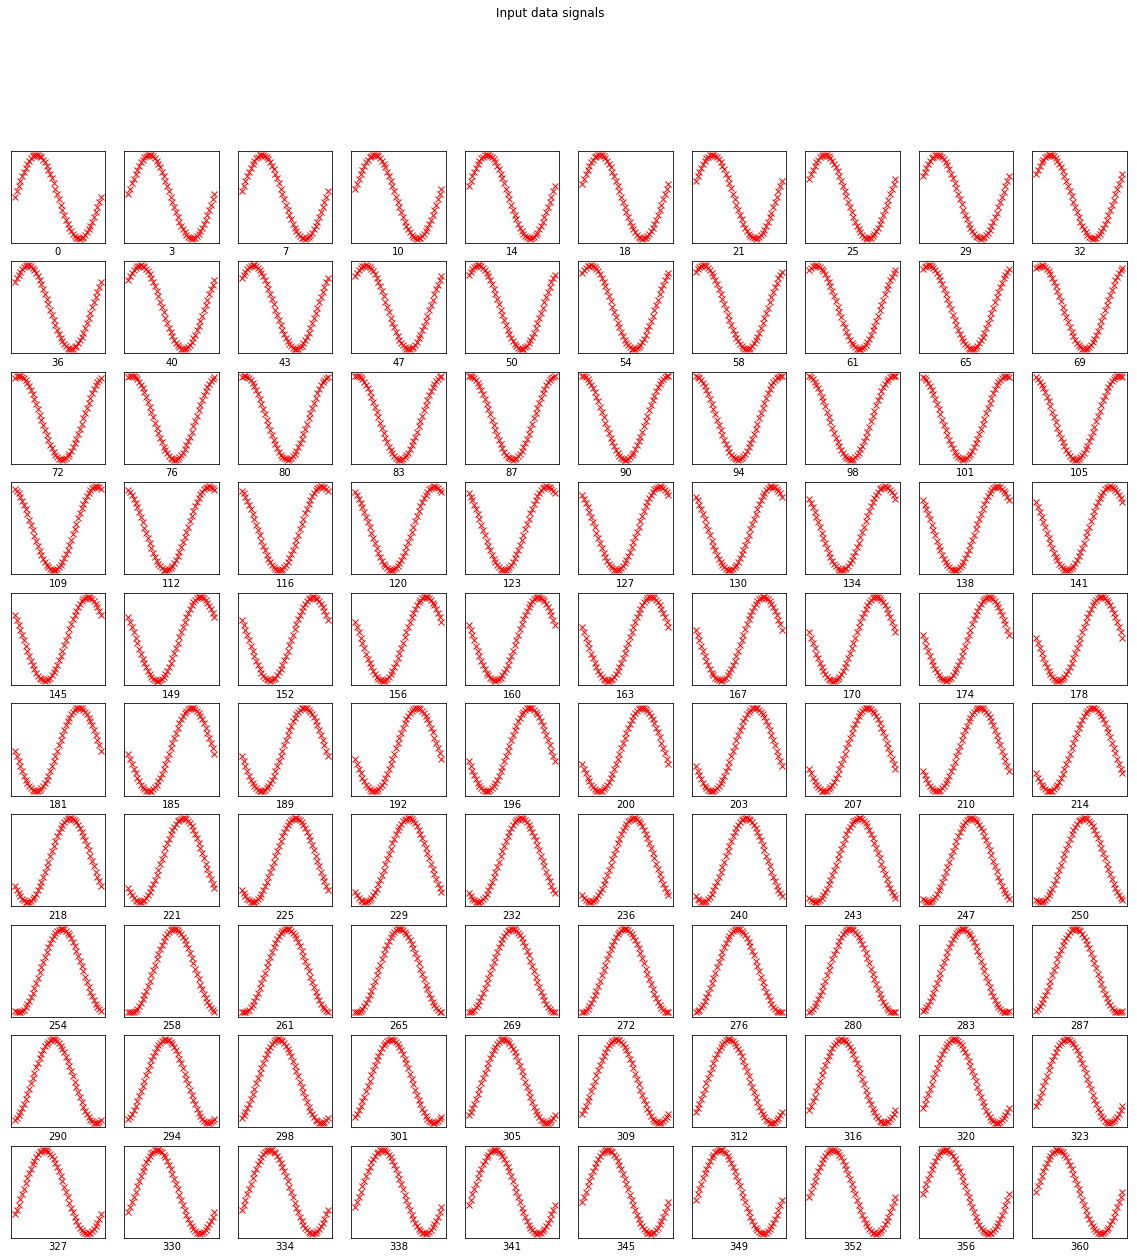

In [2]:
n_Phi = 100 # Number of data points
n_T = 50 # Dimension of sinusoidal data
omega = 2*np.pi # Angular frequency of signals
phase_range, time_range, signals = resources.sinusoidal.sinusoid_data_generation_1D(n_Phi, n_T, omega)

# PLOT THE DATA TO VISUALIZE IT ONLY FOR n_Phi = 100
fig, ax = plt.subplots(10,10)
fig.set_figheight(20)
fig.set_figwidth(20)
for num_row, row in enumerate(ax):
    for num_col, col in enumerate(row):
        col.plot(time_range, signals[np.ravel_multi_index((num_row,num_col),(10,10))],'rx')
        col.set_xticks([])
        col.set_yticks([])
        col.set_xlabel(str(int(360*phase_range[np.ravel_multi_index((num_row,num_col),(10,10))]/(2*np.pi))))
        col.grid()
plt.suptitle('Input data signals')
plt.show()

In [3]:
PATH = "C:\\Users\\Luis Pérez\\Documents\\Master\\TUE\\Final Project\\TensorFlow Models"
df = modules.restore_networks.dataframe_graphs_in_folder(PATH)

C:\Users\Luis Pérez\Documents\Master\TUE\Final Project\TensorFlow Models\models
['JoiningTest', 'TestingSaving', 'TFvaeHK']
       Experiment                                         Filenames
0     JoiningTest  JoiningTest2018-05-02-14-54_HeatKernel.ckpt.meta
1     JoiningTest      JoiningTest2018-05-03-10-34_Normal.ckpt.meta
2     JoiningTest      JoiningTest2018-05-03-10-44_Normal.ckpt.meta
3     JoiningTest      JoiningTest2018-05-03-10-47_Normal.ckpt.meta
4     JoiningTest  JoiningTest2018-05-03-10-55_HeatKernel.ckpt.meta
5     JoiningTest  JoiningTest2018-05-03-10-57_HeatKernel.ckpt.meta
6     JoiningTest  JoiningTest2018-05-03-10-58_HeatKernel.ckpt.meta
7     JoiningTest  JoiningTest2018-05-03-11-09_HeatKernel.ckpt.meta
8     JoiningTest  JoiningTest2018-05-03-11-11_HeatKernel.ckpt.meta
9     JoiningTest  JoiningTest2018-05-03-11-16_HeatKernel.ckpt.meta
10    JoiningTest  JoiningTest2018-05-03-11-19_HeatKernel.ckpt.meta
11    JoiningTest      JoiningTest2018-05-03-11-24_Normal.ck

In [4]:
dictionary_variables = modules.restore_networks.join_two_experiments(PATH, df, 10, 11)

C:\Users\Luis Pérez\Documents\Master\TUE\Final Project\TensorFlow Models\models\JoiningTest\weights\JoiningTest2018-05-03-11-19_HeatKernel.ckpt.meta restored

C:\Users\Luis Pérez\Documents\Master\TUE\Final Project\TensorFlow Models\models\JoiningTest\weights\JoiningTest2018-05-03-11-24_Normal.ckpt.meta restored



In [16]:
vae = modules.vae_nn_mapping.vae_nn_mapping(50, 0.001, -10.0, [0,1])

In [17]:
name = "first_try.cpkt"
time_str = time.strftime("%Y-%m-%d-%H-%M_")
JOINED_MODEL_PATH = PATH+'\\joined_models\\'+name
JOINED_MODEL_PATH2 = PATH+'\\joined_models\\'+name+'2'
DIR_TENSORBOARD = PATH+'\\joined_modesl\\tensorboard\\'+name+time_str
vae.assign_values(dictionary_variables, JOINED_MODEL_PATH)

Loading the variable encoder_HeatKernel/h_enc_HeatKernel/kernel:0...

Loading the variable encoder_HeatKernel/h_enc_HeatKernel/bias:0...

Loading the variable encoder_HeatKernel/h_enc2_HeatKernel/kernel:0...

Loading the variable encoder_HeatKernel/h_enc2_HeatKernel/bias:0...

Loading the variable encoder_HeatKernel/mu_z_HeatKernel/kernel:0...

Loading the variable encoder_HeatKernel/mu_z_HeatKernel/bias:0...

Loading the variable encoder_HeatKernel/log_var_z_HeatKernel/kernel:0...

Loading the variable encoder_HeatKernel/log_var_z_HeatKernel/bias:0...

Loading the variable decoder_HeatKernel/h_dec_HeatKernel/kernel:0...

Loading the variable decoder_HeatKernel/h_dec_HeatKernel/bias:0...

Loading the variable decoder_HeatKernel/h_dec2_HeatKernel/kernel:0...

Loading the variable decoder_HeatKernel/h_dec2_HeatKernel/bias:0...

Loading the variable decoder_HeatKernel/x_r_HeatKernel/kernel:0...

Loading the variable decoder_HeatKernel/x_r_HeatKernel/bias:0...

Loading the variable decoder

In [18]:
vae.train_vae(signals, epochs = 10000, log_dir_tensorboard=DIR_TENSORBOARD, weights_folder=JOINED_MODEL_PATH)

Restoring saved parameters
Epoch 0 | Loss: 4.18E+01 
Epoch 1 | Loss: 4.17E+01 
Epoch 2 | Loss: 4.15E+01 
Epoch 3 | Loss: 4.14E+01 
Epoch 4 | Loss: 4.12E+01 
Epoch 5 | Loss: 4.11E+01 
Epoch 6 | Loss: 4.09E+01 
Epoch 7 | Loss: 4.08E+01 
Epoch 8 | Loss: 4.07E+01 
Epoch 9 | Loss: 4.05E+01 
Epoch 10 | Loss: 4.04E+01 
Epoch 11 | Loss: 4.02E+01 
Epoch 12 | Loss: 4.01E+01 
Epoch 13 | Loss: 4.00E+01 
Epoch 14 | Loss: 3.98E+01 
Epoch 15 | Loss: 3.97E+01 
Epoch 16 | Loss: 3.95E+01 
Epoch 17 | Loss: 3.94E+01 
Epoch 18 | Loss: 3.93E+01 
Epoch 19 | Loss: 3.91E+01 
Epoch 20 | Loss: 3.90E+01 
Epoch 21 | Loss: 3.89E+01 
Epoch 22 | Loss: 3.87E+01 
Epoch 23 | Loss: 3.86E+01 
Epoch 24 | Loss: 3.85E+01 
Epoch 25 | Loss: 3.83E+01 
Epoch 26 | Loss: 3.82E+01 
Epoch 27 | Loss: 3.81E+01 
Epoch 28 | Loss: 3.80E+01 
Epoch 29 | Loss: 3.78E+01 
Epoch 30 | Loss: 3.77E+01 
Epoch 31 | Loss: 3.76E+01 
Epoch 32 | Loss: 3.75E+01 
Epoch 33 | Loss: 3.73E+01 
Epoch 34 | Loss: 3.72E+01 
Epoch 35 | Loss: 3.71E+01 
Epoch 36 | 

In [26]:
prediction = vae.encode(signals, weight_folder = JOINED_MODEL_PATH)
mapping = vae.map(signals, weight_folder = JOINED_MODEL_PATH)
vae_encoding = np.load('VAE_encoding.npy')
autoencoded = vae.autoencode(signals, weight_folder = JOINED_MODEL_PATH)
decoded2 = vae.decode_2(vae_encoding, weight_folder=JOINED_MODEL_PATH)
decoded1 = vae.decode_1(prediction, weight_folder=JOINED_MODEL_PATH)

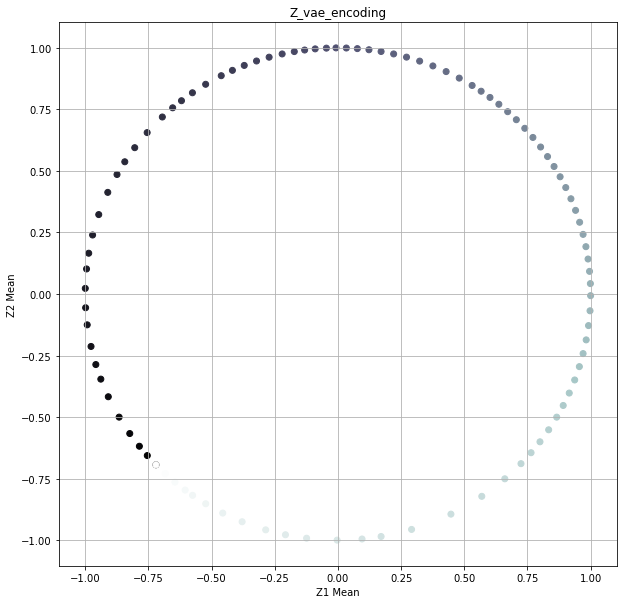

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(prediction[:,0],prediction[:,1], c = np.arange(len(prediction)), cmap = cm.bone)
plt.xlabel('Z1 Mean')
plt.ylabel('Z2 Mean')
plt.title('Z_vae_encoding')
plt.grid()
plt.show()

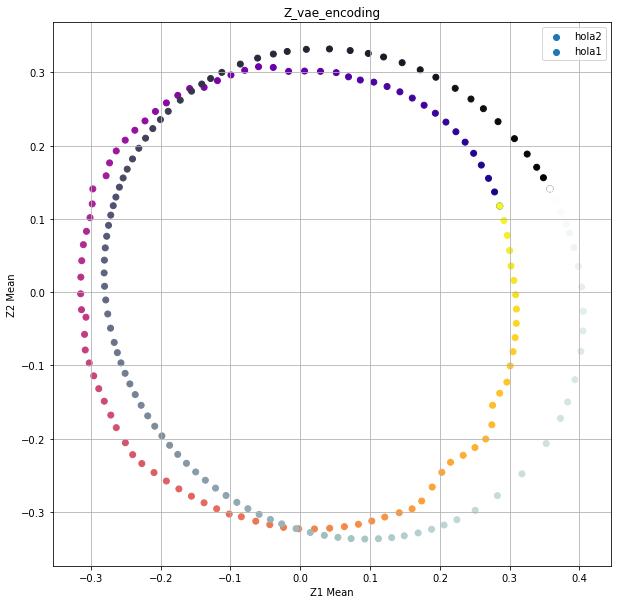

In [25]:
plt.figure(figsize=(10,10))
# plt.scatter(prediction[:,0],prediction[:,1], c = np.arange(len(prediction)), cmap = cm.gray,label = 'hola')
plt.scatter(vae_encoding[:,0],vae_encoding[:,1], c = np.arange(len(prediction)), cmap = cm.plasma,label = 'hola2')
plt.scatter(mapping[:,0],mapping[:,1], c = np.arange(len(prediction)), cmap = cm.bone,label = 'hola1')

plt.xlabel('Z1 Mean')
plt.ylabel('Z2 Mean')
plt.legend()
plt.title('Z_vae_encoding')
plt.grid()
plt.savefig("Commutable_linear")
plt.show()


In [11]:
np.mean(np.sum((autoencoded[0]-autoencoded[1])**2,axis = -1))

10.556341

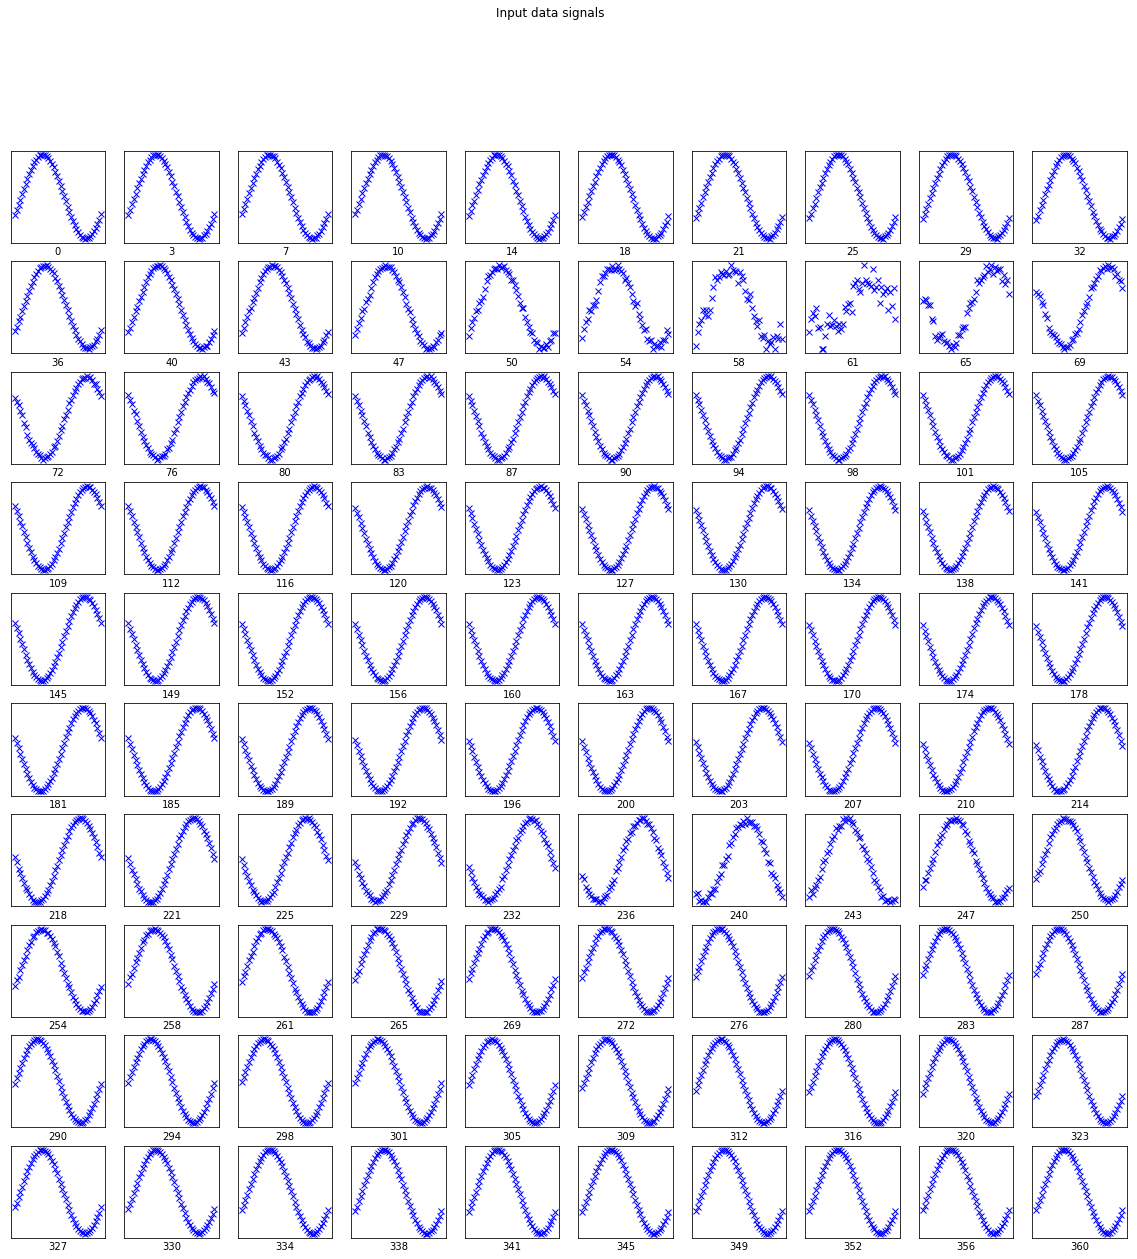

In [12]:
fig, ax = plt.subplots(10,10)
fig.set_figheight(20)
fig.set_figwidth(20)
for num_row, row in enumerate(ax):
    for num_col, col in enumerate(row):
#         col.plot(time_range, signals[np.ravel_multi_index((num_row,num_col),(10,10))],'rx')
        col.plot(time_range, autoencoded[0][np.ravel_multi_index((num_row,num_col),(10,10))]-autoencoded[1][np.ravel_multi_index((num_row,num_col),(10,10))],'bx')
        col.set_xticks([])
        col.set_yticks([])
        col.set_xlabel(str(int(360*phase_range[np.ravel_multi_index((num_row,num_col),(10,10))]/(2*np.pi))))
        col.grid()
plt.suptitle('Input data signals')
plt.show()

In [13]:
np.mean(np.sum((decoded2-decoded1)**2,axis = -1))

0.0026730162

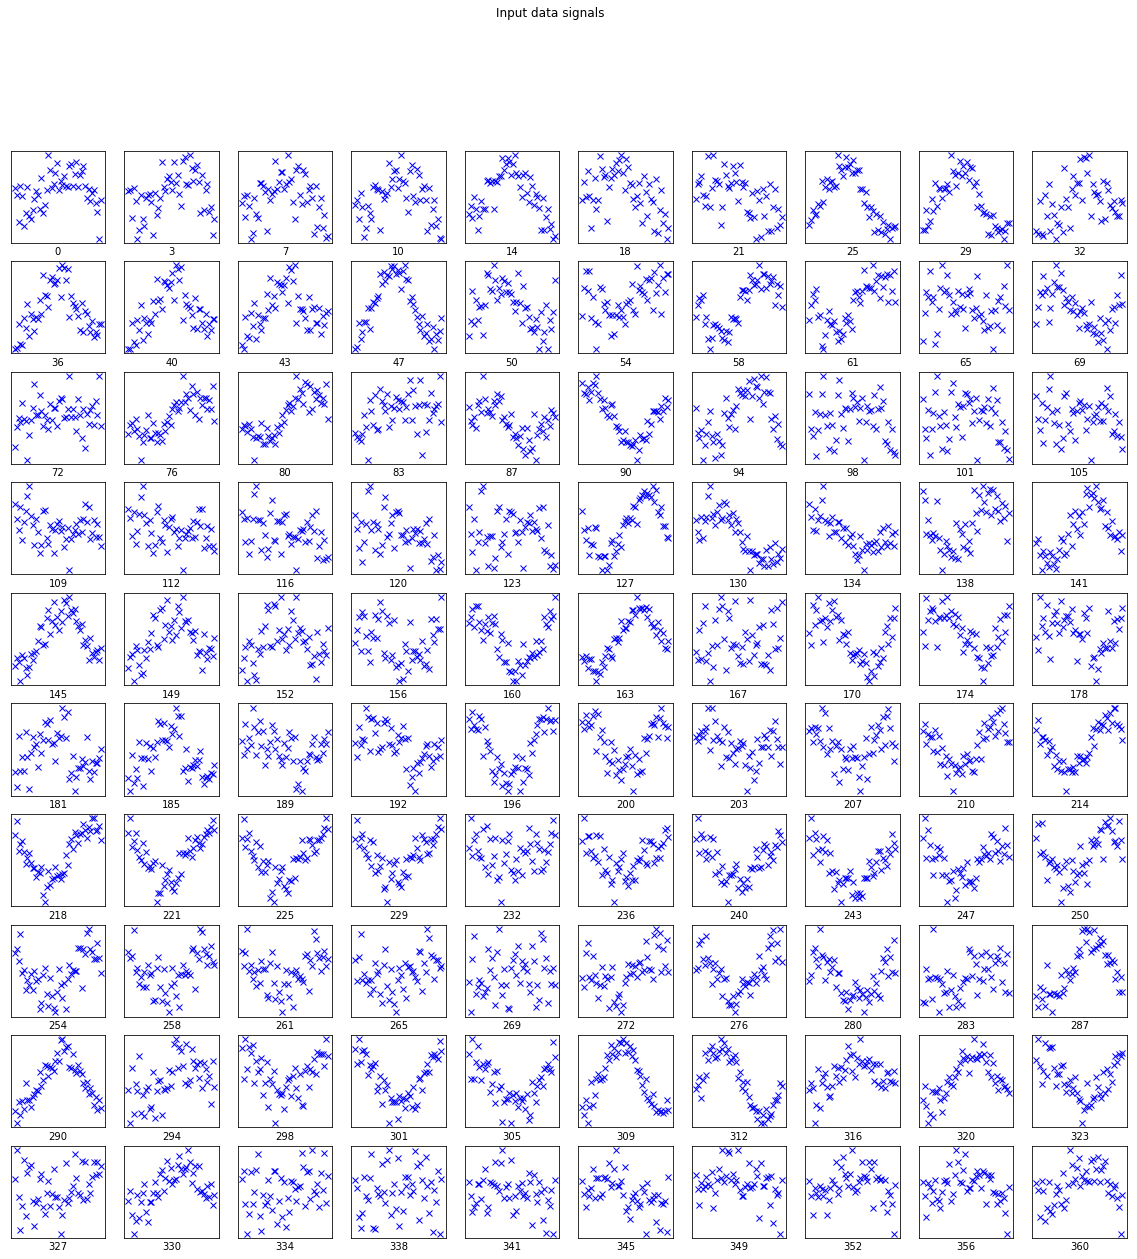

In [14]:
fig, ax = plt.subplots(10,10)
fig.set_figheight(20)
fig.set_figwidth(20)
for num_row, row in enumerate(ax):
    for num_col, col in enumerate(row):
#         col.plot(time_range, signals[np.ravel_multi_index((num_row,num_col),(10,10))],'rx')
        col.plot(time_range, decoded1[np.ravel_multi_index((num_row,num_col),(10,10))]-decoded2[np.ravel_multi_index((num_row,num_col),(10,10))],'bx')
        col.set_xticks([])
        col.set_yticks([])
        col.set_xlabel(str(int(360*phase_range[np.ravel_multi_index((num_row,num_col),(10,10))]/(2*np.pi))))
        col.grid()
plt.suptitle('Input data signals')
plt.show()

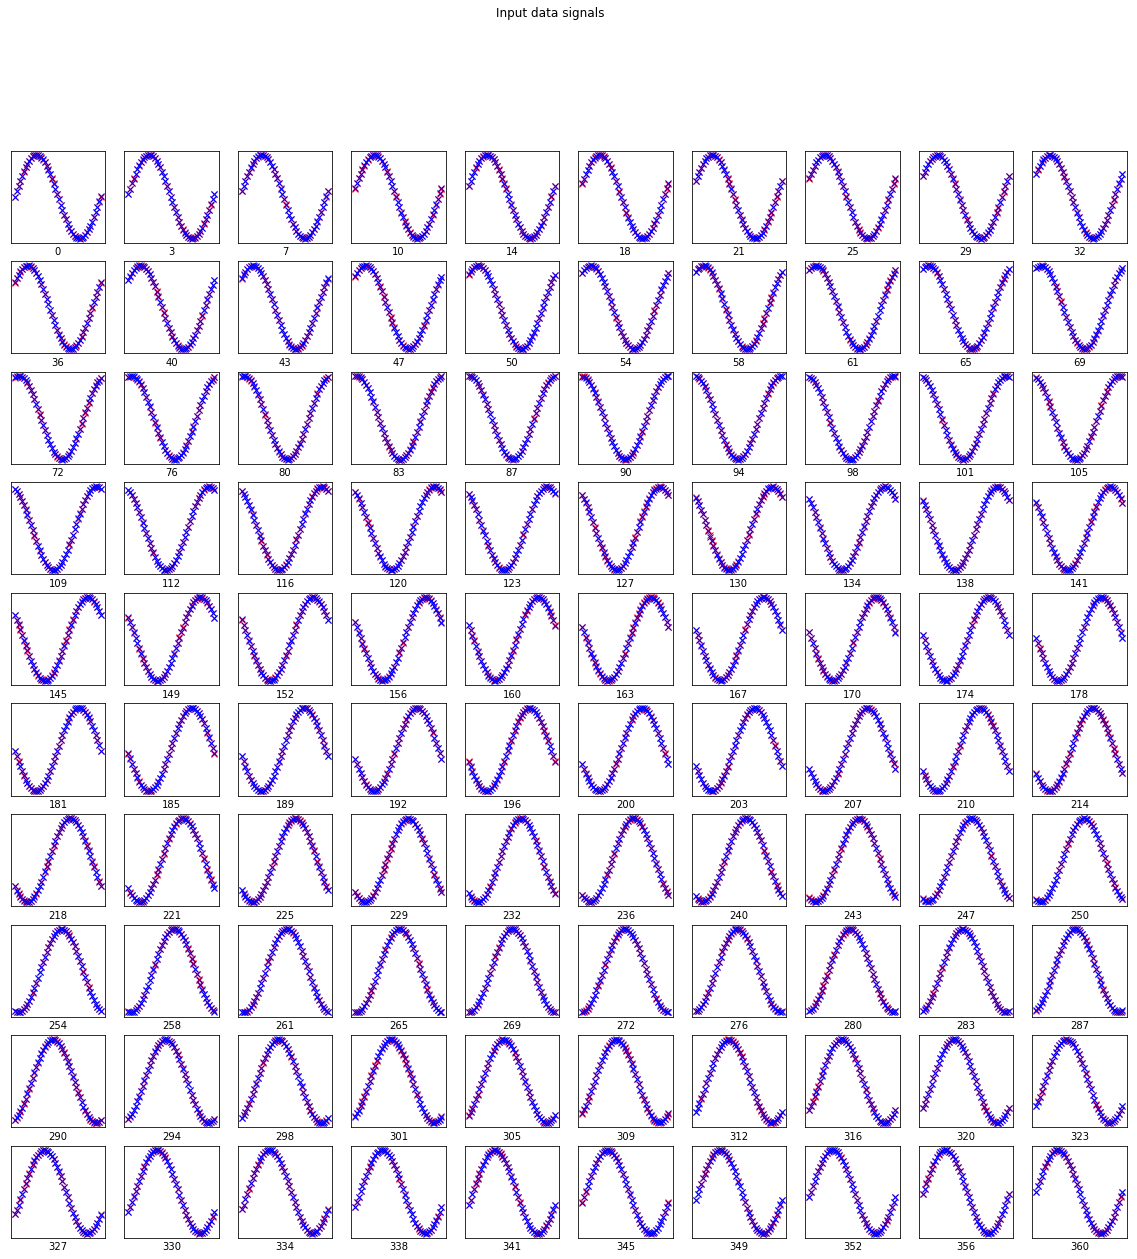

In [15]:
fig, ax = plt.subplots(10,10)
fig.set_figheight(20)
fig.set_figwidth(20)
for num_row, row in enumerate(ax):
    for num_col, col in enumerate(row):
        col.plot(time_range, signals[np.ravel_multi_index((num_row,num_col),(10,10))],'rx')
        col.plot(time_range, decoded2[np.ravel_multi_index((num_row,num_col),(10,10))],'bx')
        col.set_xticks([])
        col.set_yticks([])
        col.set_xlabel(str(int(360*phase_range[np.ravel_multi_index((num_row,num_col),(10,10))]/(2*np.pi))))
        col.grid()
plt.suptitle('Input data signals')
plt.show()

![Thoughts1](thougts1.png)